# Imports

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def plotTheFunc(data , *funcs):
    """
    This method just prints plots side by side
    data:- the array data
    funcs :- func on which the data will be applied and ploted
    """
    l = len(funcs)
    plt.figure(figsize=(20,5))
    for index , fun in enumerate(funcs):
        plt.subplot(1,l , index+1)
        plt.title(fun.__name__)
        plt.plot(fun(data))
    plt.show()
    

# Activation Functions


## What is activation and Activation Function
 
**Activation** is nothing but just an output of a given activation function which is applied on the Perceptron.
 
**Activation functions** are the non linear transformation that we do over the input signal. This transformed output is then sen to the next layer of neurons as input.

**Why are they important**
<br>
A neural network without an activation function is essentially just a linear regression model. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. We would want our neural networks to work on complicated tasks like language translations and image classifications. Linear transformations would never be able to perform such tasks.
![](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)


Activations signifies how much weight does that neuron has for particular output or how much it contributes to the cost function i.e if weight is nudged a little how much the cost function is affected.

Here in the figure step function is an activation function.

The equation for neural net in the figure
$$
y = \sum wx+b
$$

Let's define a boolean valued function F(x) where x is a value and function F defines whether that neuron is active or not.
\begin{cases}
  F(y) = 1 & \text{Activate the neuron }\\    
  F(y) = 0 & \text{Deactivate the neuron }   
\end{cases}


Activation function's are of two types 

1. Linear :- The problem with linear function is it fails to model different complex and unfamiliar data given to it.  

2. Non-linear :- It generalize seamlessly with complex data models and fits perfectly

***Before defining an activation function, one important characteristic which should be always taken into consideration is it should be differentiable so that we can calculate gradient descent i.e the function should be continous***

We use multiple type of Activations like 
1. Tanh 
2. Sigmoid
3. Relu
4. Leaky Relu
5. Softmax
5. elu
6. selu

and many more

##  Sigmoid

It squashes the output from (0 to 1) giving a value between zero to one thus can be used like probability.

This function is continous and differentiable to.

The formulae is 
$$
{\phi(x)={1\over(1+e^-x)}}
$$
The differentiation of the sigmoid is 
$$
{{d \over dx} \phi(x)} =\phi(x)(1-\phi(x)) 
$$


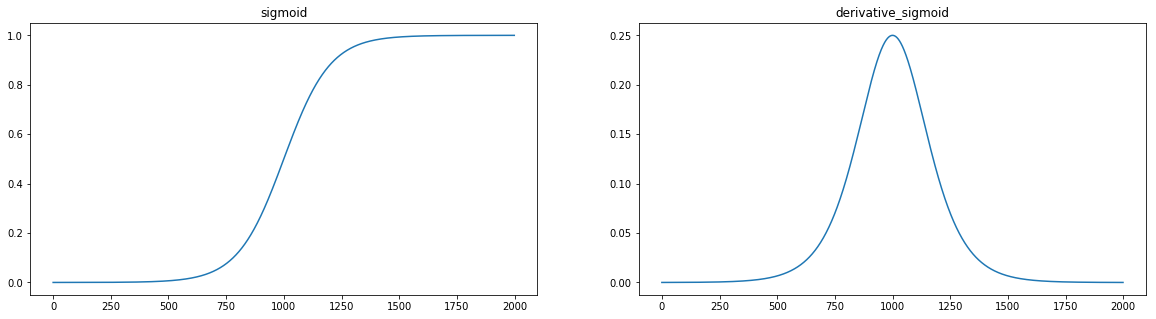

In [72]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

def derivative_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

a = np.arange(-10,10,0.01)
plotTheFunc(a , sigmoid , derivative_sigmoid)

## Tanh
Tanh output is also like sigmoid but better. It squashes the input to (-1 to 1).

The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

The function is differentiable.

$$
f(x) = tanh(x)
$$

$$
\frac{d f(x)}{dx} = 1 - tanh^2(x)
$$
[Better understanding of hyperbolic derivative](http://math2.org/math/derivatives/more/hyperbolics.htm)



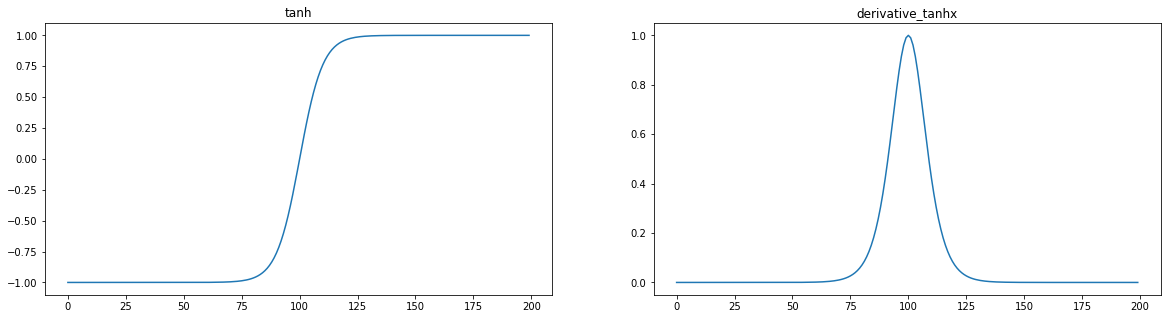

In [73]:
a = np.arange(-10,10,0.1)
def derivative_tanh(x):
    return 1 - np.tanh(x)**2
plotTheFunc(a , np.tanh , derivative_tanhx)

## Relu(Rectified Linear Unit)
These days we don't use Sigmoid because of vanishing gradient and exploading gradient problem instead we use Relu 

Relu is very simple which says give zero for negative and same input as output if positive, thus by preserving the values it solves both vaishing and exploding gradient problem

Mathematically the formulae is 
$$
f(x) = max(0,x)
$$
Using Relu we skip the computation overhead in sigmoid and it shows better result when experimented. so we use this.


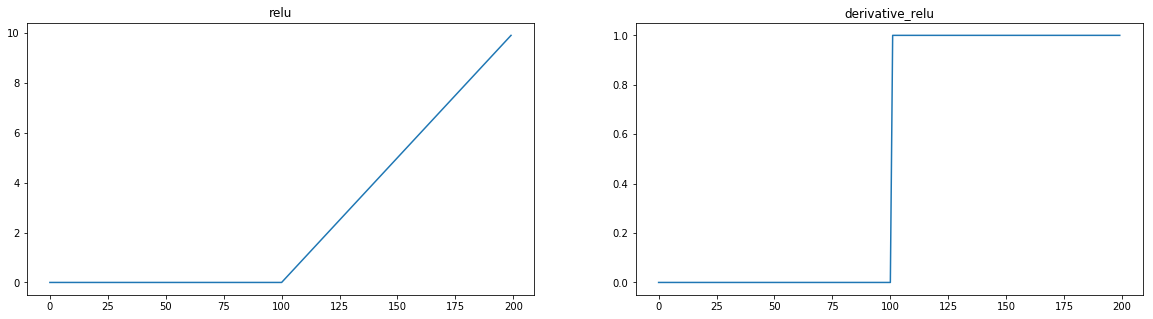

In [74]:
def relu(x):
    return np.where(a>0 ,a,0)

def derivative_relu(x):
    return np.where(x>0 , 1,0)

plotTheFunc(a , relu , derivative_relu)

## Softmax

Softmax function is like sigmoid function which squashes the output between 0 and 1.

The formulae is 
$$
f(z) = \frac{e^z}{\sum_{i=1}^N e^z}
$$
Softmax used only be used in final output layer

In [75]:
z = np.array((0.5,0.4,1.5))
def softmax(z):
    s = np.sum(np.e**z)
    return (np.e**z)/s
print(z )
print(np.round(softmax(z),6))

[0.5 0.4 1.5]
[0.216304 0.19572  0.587976]


### Why Softmax ?
Here is an example let's suppose the network spits out three numbers (without softmax layers) [0.5 , 0.4, 1.5] and the let's say for this particular training example 3rd output is the correct output.

So to penalize more to the incorrect classification and rather increase the prediction value for the correct lable we use softmax.In this example the 1.5 input value got the highest value of 0.5879 after using softmax layer in comparison to other neuron output which got small values.

The fun thing about softmax is that returns a probability distribution i.e if summed it returns 1.  [proof](https://math.stackexchange.com/questions/331275/softmax-function-and-modelling-probability-distributions)


![](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*DRKBmIlr7JowhSbqL6wngg.png&f=1)

## Make a Note

1. Today in all convolution problems we use Relu primarly
2. Sigmoid is used in RNNs and Multilabel problems
3. Tanh is used in LSTM
4. SoftMax is used in Multiclass problem at the output layer
4. Play with different variants of relu and use which suits the model requirements.


# Different Variants of RELU 
List of all other relu variants, these all activation functions are respectively proven good in comparison with relu but therotically and when applied pratically gives almost the same results. 

![](https://cdn-images-1.medium.com/max/800/1*p_hyqAtyI8pbt2kEl6siOQ.png)



# References

[Activation Functions](https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/)